In [22]:
#Plot an interesting case from BARPA-ACCESS which generates a very high wind gust at Coffs Harbour (47.0 m/s)

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import wrf
from wrf_parallel import get_storm_motion, get_mean_var_hgt
from era5_read import read_era5
import datetime as dt
import metpy.units as units
import metpy.calc as mpcalc

lon1 = 150; lat1 = -35; lon2 = 157; lat2 = -25 
m = Basemap(llcrnrlon=lon1, llcrnrlat=lat1, urcrnrlon=lon2, urcrnrlat=lat2,projection="cyl",resolution="h")
u_ds = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-EASTAUS_12km/cmip5/ACCESS1-0/r1i1p1/19990901T0000Z/20040417T0000Z/pp2/wnd_ucmp_uv-pp2-BARPA-EASTAUS_12km-20040417T0000Z.nc")
v_ds = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-EASTAUS_12km/cmip5/ACCESS1-0/r1i1p1/19990901T0000Z/20040417T0000Z/pp2/wnd_vcmp_uv-pp2-BARPA-EASTAUS_12km-20040417T0000Z.nc")
wg_ds = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-EASTAUS_12km/cmip5/ACCESS1-0/r1i1p1/19990901T0000Z/20040417T0000Z/pp0/max_wndgust10m-pp0-BARPA-EASTAUS_12km-20040417T0000Z.nc")

Text(0.5, 1.0, 'Instantaneous 850 hPa wind (2004-04-19 12:00 UTC)')

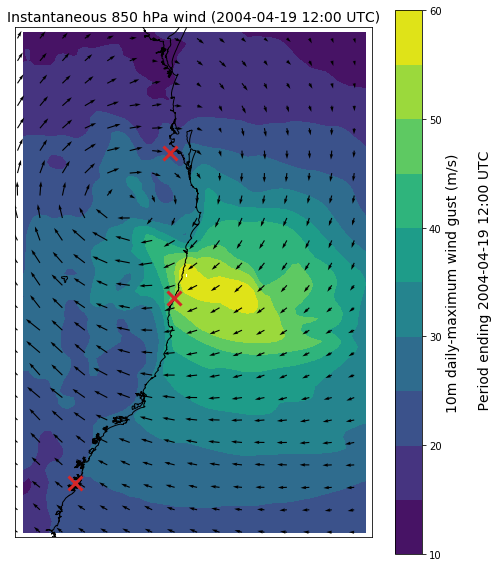

In [68]:
u = u_ds.isel({"pressure":-3}).sel({"time":"2004-04-19 12", "longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2)})["wnd_ucmp_uv"]
v = v_ds.isel({"pressure":-3}).sel({"time":"2004-04-19 12", "longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2)})["wnd_vcmp_uv"].interp_like(u)
wg = wg_ds.sel({"time":"2004-04-19 12", "longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2)})["max_wndgust10m"].interp_like(u)
x,y = np.meshgrid(u.longitude, u.latitude)

plt.figure(figsize=[8,10])

stride=4
u = u.values[0:u.shape[0]:stride, 0:u.shape[1]:stride]
v = v.values[0:v.shape[0]:stride, 0:v.shape[1]:stride]
x1 = x[0:x.shape[0]:stride, 0:x.shape[1]:stride]
y1 = y[0:y.shape[0]:stride, 0:y.shape[1]:stride]       

plt.contourf(x,y,wg,levels=np.linspace(10,60,11))
cb=plt.colorbar(); cb.set_label("10m daily-maximum wind gust (m/s)\n\n Period ending 2004-04-19 12:00 UTC", size=14)
plt.quiver(x1,y1,u,v)
m.drawcoastlines()
plt.plot(153.1187,-30.3107,marker="x",color="tab:red",ms=14,mew=3)
plt.plot(153.0251, -27.4698,marker="x",color="tab:red",ms=14,mew=3)
plt.plot(151.1731, -33.9465,marker="x",color="tab:red",ms=14,mew=3)
plt.title("Instantaneous 850 hPa wind (2004-04-19 12:00 UTC)",size=14)